In [1]:
import os
import cv2
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.metrics import Recall,Precision 

In [45]:
train_dir=r"C:\Users\mwael\OneDrive\Desktop\home\course\kaggel\kaggeldata\Training"
labels=os.listdir(train_dir)
print(labels) 

['glioma', 'meningioma', 'notumor', 'pituitary']


In [46]:
train_glioma=os.path.join(train_dir,"glioma") 
train_meningioma=os.path.join(train_dir,"meningioma")
train_notumor=os.path.join(train_dir,"notumor")
train_pituitary=os.path.join(train_dir,"pituitary")

In [47]:
print("no.glioma",len(os.listdir(train_glioma)))
print("no.meningioma",len(os.listdir(train_meningioma)))
print("no.notumor",len(os.listdir(train_notumor)))
print("no.pituitary",len(os.listdir(train_pituitary)))         

no.glioma 1321
no.meningioma 1339
no.notumor 1595
no.pituitary 1457


In [5]:
sample_train_glioma=os.listdir(train_glioma)[0]
sample_train_meningioma=os.listdir(train_meningioma)[0]
sample_train_notumor=os.listdir(train_notumor)[0]
sample_train_pituitary=os.listdir(train_pituitary)[0]

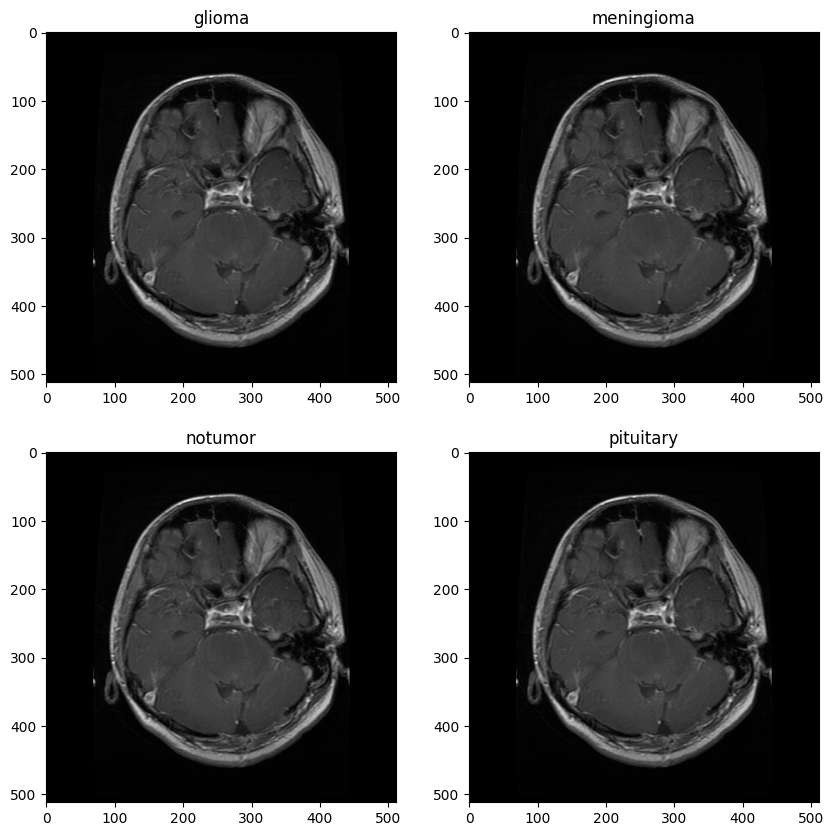

In [6]:
glioma_image=os.path.join(train_glioma,sample_train_glioma)
meningioma_image=os.path.join(train_meningioma,sample_train_meningioma)
notumor_image=os.path.join(train_notumor,sample_train_notumor)
pituitary_image=os.path.join(train_pituitary,sample_train_pituitary)

plt.figure(figsize=(10,10)) # size
for i in range(1,5):
    plt.subplot(2,2,i)
    title=labels[i-1]
    img = cv2.imread(glioma_image)
    plt.title(title)
    plt.imshow(img)
    

In [7]:
type(img) 

numpy.ndarray

In [8]:
img.shape 

(512, 512, 3)

In [9]:
images=[] 
images_labels=[] 
for i in labels:   
    path=os.path.join(train_dir,i) 
    for img in os.listdir(path): 
        one_image=cv2.imread(os.path.join(path,img)) 
        if one_image is not None:
            resize_image=cv2.resize(one_image,(256,256))
            images.append(resize_image)
            images_labels.append(labels.index(i))

In [10]:
type(images),type(images_labels)

(list, list)

In [11]:
images_labels=np.array(images_labels)
images=np.array(images)
type(images),type(images_labels)

(numpy.ndarray, numpy.ndarray)

In [30]:

images.shape

(6564, 256, 256, 3)

In [13]:
NN_model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu",),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu",),
    MaxPooling2D((2,2)),
    ])
NN_model.summary() 

c:\Users\mwael\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
NN_model.add(Flatten())
NN_model.add(Dense(128,activation="relu"))
NN_model.add(Dense(128,activation="relu"))
NN_model.add(Dense(64,activation="relu"))
NN_model.add(Dense(64,activation="relu"))
NN_model.add(Dense(64,activation="relu"))
NN_model.add(Dense(32,activation="relu"))
NN_model.add(Dense(16,activation="relu"))
NN_model.add(Dense(4,activation="softmax"))
NN_model.summary()  

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,874,740 (56.74 MB)

 Trainable params: 14,874,740 (56.74 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
NN_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[
        Precision(name="precision"),
        Recall(name="recall"),"accuracy"
             ])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(images,images_labels,test_size=0.2,random_state=42)

In [17]:
type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)


NN_model.fit(x_train, y_train_one_hot, epochs=10, batch_size=8, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 300s 449ms/step - accuracy: 0.6533 - loss: 2.0151 - precision: 0.7206 - recall: 0.5319 - val_accuracy: 0.8324 - val_loss: 0.4863 - val_precision: 0.8751 - val_recall: 0.7738
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 291s 443ms/step - accuracy: 0.8881 - loss: 0.3605 - precision: 0.9123 - recall: 0.8590 - val_accuracy: 0.9056 - val_loss: 0.3486 - val_precision: 0.9118 - val_recall: 0.8972
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 293s 446ms/step - accuracy: 0.9298 - loss: 0.2311 - precision: 0.9395 - recall: 0.9162 - val_accuracy: 0.8919 - val_loss: 0.3380 - val_precision: 0.9020 - val_recall: 0.8835
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 295s 449ms/step - accuracy: 0.9412 - loss: 0.1951 - precision: 0.9468 - recall: 0.9363 - val_accuracy: 0.9231 - val_loss: 0.2525 - val_precision: 0.9298 - val_recall: 0.9177
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 294s 448ms/step - accuracy: 0.9525 - loss: 0.1626 - precision: 0.9570 - recall: 0.9465 - val_accuracy: 0

In [48]:
NN_model.save("brain_tumor.keras")

In [54]:
import cv2
import numpy as np

def prepare_image(path):
    image = cv2.imread(path)
    if image is None:
        raise ValueError("Failed to load image. Please check the path.") 
    resized_image = cv2.resize(image, (256, 256)) 
    resized_image = np.expand_dims(resized_image, axis=-1)
    resized_image = resized_image.astype('float32')
    resized_image /= 255.0
    image_array = np.array([resized_image])
    return image_array

image_path = r"C:\Users\mwael\OneDrive\Desktop\home\course\kaggel\kaggeldata\Testing\notumor\Te-no_0013.jpg"
prepared_image = prepare_image(image_path)
predicted = NN_model.predict(prepared_image)
print("Predicted class probabilities:", predicted)
predicted_class = np.argmax(predicted, axis=1) 
print("Predicted class index:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class probabilities: [[0.0053292  0.02892848 0.9508582  0.01488416]]
Predicted class index: 2
